In [1]:
import os
import re
import csv
import urllib
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
import plotly.offline as py
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
sns.set(style='white',palette = 'Set3',context = 'talk')

In [2]:
if os.path.exists("marvel.csv"):
    os.remove("marvel.csv")
api.dataset_download_file('fivethirtyeight/fivethirtyeight-comic-characters-dataset', 'marvel-wikia-data.csv')
with zipfile.ZipFile("marvel-wikia-data.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()
os.rename("marvel-wikia-data.csv", "marvel.csv")
os.remove("marvel-wikia-data.csv.zip")
marvel = pd.read_csv("marvel.csv")
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [3]:
if os.path.exists("dc.csv"):
    os.remove("dc.csv")
api.dataset_download_file('fivethirtyeight/fivethirtyeight-comic-characters-dataset', 'dc-wikia-data.csv')
with zipfile.ZipFile("dc-wikia-data.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()
os.rename("dc-wikia-data.csv", "dc.csv")
os.remove("dc-wikia-data.csv.zip")
dc = pd.read_csv("dc.csv")
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [4]:
dcdist = dc['SEX'].value_counts()
marveldist = marvel['SEX'].value_counts()
dctrace = go.Pie(labels = dcdist.index, values = dcdist.values, name = 'DC', domain = {"column": 0})
marveltrace = go.Pie(labels = marveldist.index, values = marveldist.values, name = 'Marvel', domain = {"column": 1})
layout = go.Layout(title = 'Gender Distributions of DC and Marvel Respectively', width = 750, grid = {"rows": 1, "columns": 2})
py.iplot(go.Figure(data = [dctrace, marveltrace], layout = layout))

In [5]:
dcdist = dc['ALIGN'].value_counts()
marveldist = marvel['ALIGN'].value_counts()
dctrace = go.Bar(x = dcdist.index, y = dcdist.values, name = 'DC', marker=dict(color='rgb(255,163,63)'))
marveltrace = go.Bar(x = marveldist.index, y = marveldist.values, name = 'Marvel', marker=dict(color='rgb(146,205,40)'))
py.iplot(go.Figure(data = [dctrace, marveltrace], layout = go.Layout(title = 'Character Distributions', width=600)))

In [6]:
dcdist = dc['ID'].value_counts()
marveldist = marvel['ID'].value_counts()
dctrace = go.Pie(labels = dcdist.index, values = dcdist.values, name = 'DC', domain = {"column": 0}, hole = 0.3)
marveltrace = go.Pie(labels = marveldist.index, values = marveldist.values, name = 'Marvel', domain = {"column": 1}, hole = 0.3)
layout = go.Layout(title = 'Identity Distributions', width = 900, grid = {"rows": 1, "columns": 2}, annotations = [
         {"font": {"size": 20}, "showarrow": False, "text": "DC", "x": 0.21, "y": 0.5 },
         {"font": {"size": 20}, "showarrow": False, "text": "Marvel", "x": 0.82, "y": 0.5 }])
py.iplot(go.Figure(data = [dctrace, marveltrace], layout = layout))

In [7]:
dcdist = dc['ALIVE'].value_counts() 
marveldist = marvel['ALIVE'].value_counts()
dctrace = go.Bar(x = dcdist.index, y = dcdist.values, name = 'DC', marker=dict(color='rgb(20,61,89)'))
marveltrace = go.Bar(x = marveldist.index, y = marveldist.values, name = 'Marvel', marker=dict(color='rgb(244,180,26)'))
py.iplot(go.Figure(data = [dctrace, marveltrace], layout = go.Layout(title = 'Mortality Distribution', width=600, barmode='stack')))

In [8]:
hightrace  = go.Scatter(x=marvel.Year, y=marvel.APPEARANCES, name = "Marvel Appearances", line = dict(color = '#17BECF'), opacity = 0.8)
lowtrace = go.Scatter(x=dc.YEAR, y=dc.APPEARANCES, name = "DC Appearances", line = dict(color = '#7F7F7F'), opacity = 0.8)
layout = dict(title='Appearances with respect to Origin year', width = 750,xaxis=dict
(rangeselector=dict(buttons= list([dict(count=1, label='1Y',step='year', stepmode='backward'),
dict(count=6, label='6Y',step='year',stepmode='backward'),dict(step='all')])),rangeslider=dict(visible = True),type='date'))
py.iplot(dict(data= [hightrace ,lowtrace], layout=layout))

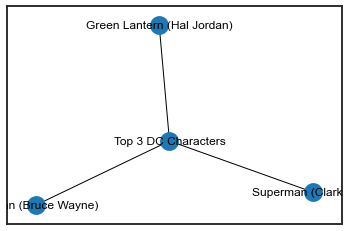

In [9]:
dc['comics']= 'Top 3 DC Characters'
dctop3 = dc.truncate(before=-1, after=2)
FG = nx.from_pandas_edgelist(dctop3, source='comics', target='name', edge_attr=True)
nx.draw_networkx(FG, with_labels=True)

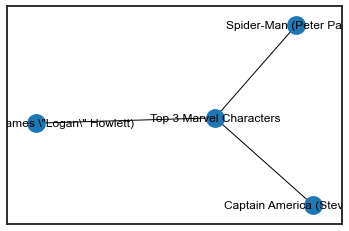

In [10]:
marvel['comics'] = 'Top 3 Marvel Characters'
marveltop3 = marvel.truncate(before=-1, after=2)
FG = nx.from_pandas_edgelist(marveltop3, source='comics', target='name', edge_attr=True)
nx.draw_networkx(FG, with_labels=True)

Suprisingly Iron Man (Tony Stark) is not present in the Top 3 Marvel Characters according to the data extracted from internet.

In [11]:
marvel = marvel.drop(columns = "comics")
dc = dc.drop(columns= "comics")
marvelheroes = marvel.loc[marvel['ALIGN'] == "Good Characters"].head(10)
marvelvillains = marvel.loc[marvel['ALIGN'] == "Bad Characters"].head(10)
dcheroes = dc.loc[dc['ALIGN'] == "Good Characters"].head(10)
dcvillains = dc.loc[dc['ALIGN'] == "Bad Characters"].head(10)

In [12]:
def clean(x):
    x.name = x.name.apply(lambda x: x.split('(')[0])
    cols = ('ID','ALIGN','EYE','HAIR','SEX','ALIVE')
    for c in cols:
       x[c]=  x[c].fillna('Unknown')
       x[c]=  x[c].apply(lambda x: x.split(' ')[0])
clean(marvelheroes)
clean(marvelvillains)
clean(dcheroes)
clean(dcvillains)

Text(0.5, 1.0, 'Top Appearance of Villains in DC')

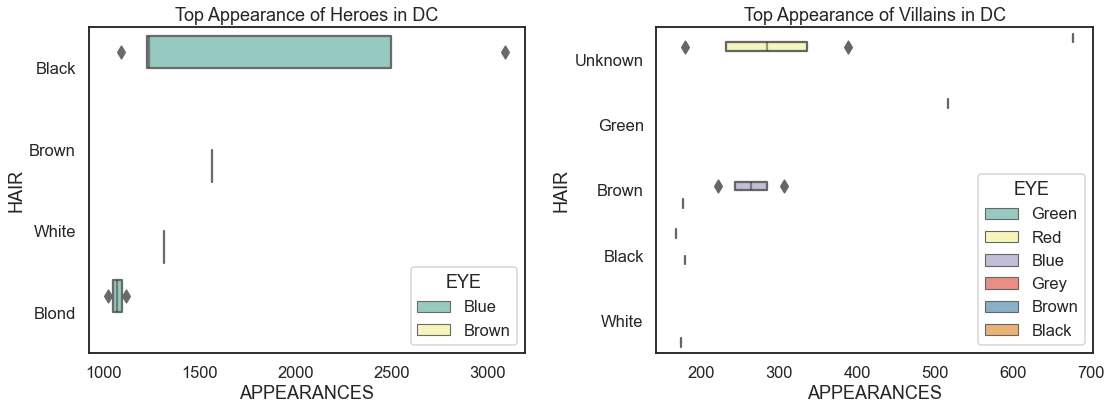

In [13]:
plt.subplots(1,2,figsize=(18,6))
plt.subplots_adjust(wspace =0.3)
plt.subplot(121)
sns.boxenplot(x='APPEARANCES', y='HAIR',data= dcheroes ,hue='EYE').set_title('Top Appearance of Heroes in DC')
plt.subplot(122)
sns.boxenplot(x='APPEARANCES', y='HAIR',data= dcvillains ,hue='EYE').set_title('Top Appearance of Villains in DC')

In DC :- \
Heroes mostly have black hair with blue eyes and sometimes blond hair with brown eyes \
Villains mostly have red eyes with any hair color or sometimes brown hair with blue eyes

Text(0.5, 1.0, 'Top Appearance of Villians in Marvel')

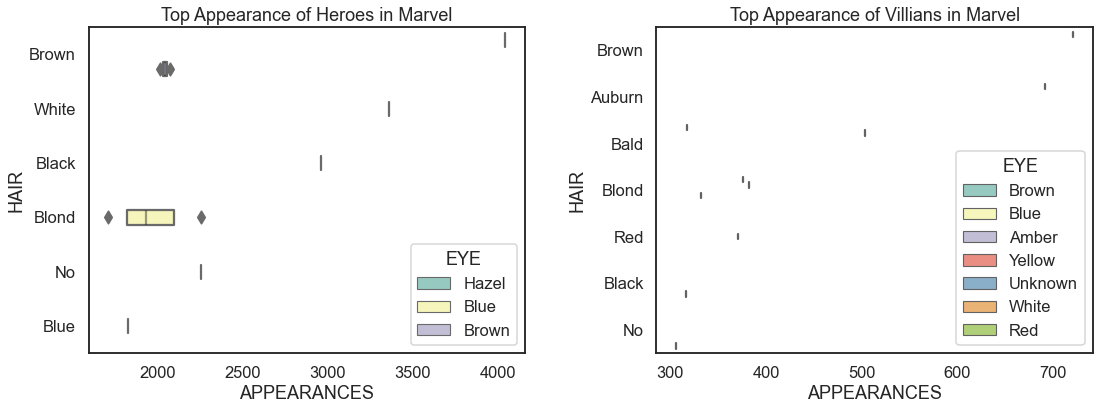

In [14]:
plt.subplots(1,2,figsize=(18,6))
plt.subplots_adjust(wspace =0.3)
plt.subplot(121)
sns.boxenplot(x='APPEARANCES', y='HAIR',data = marvelheroes ,hue='EYE').set_title('Top Appearance of Heroes in Marvel')
plt.subplot(122)
sns.boxenplot(x='APPEARANCES', y='HAIR',data = marvelvillains ,hue='EYE').set_title('Top Appearance of Villians in Marvel')

In Marvel :- \
Heroes mostly have blond hair with blue eyes and occasionaly other appearences \
Villians dont have any specefic appearence

In [15]:
dcdead = dc.loc[dc['ALIVE'] == "Deceased Characters"]
marveldead = marvel.loc[marvel['ALIVE'] == "Deceased Characters"]
dcdist = dcdead['ALIGN'].value_counts()
marveldist = marveldead['ALIGN'].value_counts()
dctrace = go.Pie(labels = dcdist.index, values = dcdist.values, name = 'DC', domain = {"column": 0}, hole = 0.3)
marveltrace = go.Pie(labels = marveldist.index, values = marveldist.values, name = 'Marvel', domain = {"column": 1}, hole = 0.3)
layout = go.Layout(title = 'Deceased Characters', width = 900, grid = {"rows": 1, "columns": 2}, annotations = [
         {"font": {"size": 20}, "showarrow": False, "text": "DC", "x": 0.21, "y": 0.5 },
         {"font": {"size": 20}, "showarrow": False, "text": "Marvel", "x": 0.82, "y": 0.5 }])
py.iplot(go.Figure(data = [dctrace, marveltrace], layout = layout))

In Marvel more villians are deceased as proportional to DC \
That's why DC is darker than Marvel becuase it has more villians living as proportional to Marvel

Transgender Characters in DC with their images extracted from the internet
Daystar (New Earth)


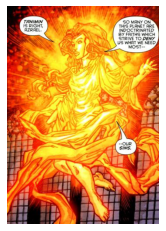

In [16]:
print("Transgender Characters in DC with their images extracted from the internet")
dctc = dc.loc[dc['SEX'] == "Transgender Characters"].name
for i in dctc:
    print(i)
    temp = i.replace(" ", "_")
    dclink = 'https://dc.fandom.com/wiki/'+temp
    html = urlopen(dclink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")

Genderfluid Characters in Marvel with their images extracted from the internet
Loki Laufeyson (Earth-616)


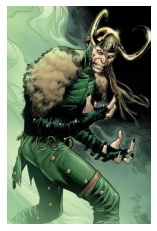

Xavin (Earth-616)


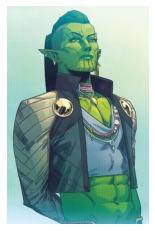

In [17]:
print("Genderfluid Characters in Marvel with their images extracted from the internet")
marvelgc = marvel.loc[marvel['SEX'] == "Genderfluid Characters"].name
for i in marvelgc:
    print(i)
    temp = i.replace(" ", "_")
    marvellink = 'https://marvel.fandom.com/wiki/'+temp
    html = urlopen(marvellink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")

Let's see If you know this random DC character 

Name :  Lili de Neuve (New Earth)


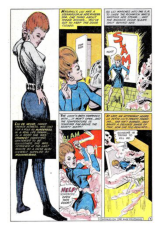

Find out more about this DC character here :  https://dc.fandom.com/wiki/Lili_de_Neuve_(New_Earth)


In [18]:
dcrand = dc.sample().name
for i in dcrand:
    print("Name : ",i)
    temp = i.replace(" ", "_")
    dclink = 'https://dc.fandom.com/wiki/'+temp
    html = urlopen(dclink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")
    print("Find out more about this DC character here : ",dclink)

Let's see If you know this random Marvel character 

Name :  Mortimer Toynbee (Earth-616)


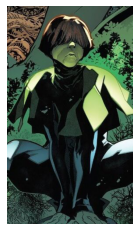

Find out more about this Marvel character here :  https://marvel.fandom.com/wiki/Mortimer_Toynbee_(Earth-616)


In [19]:
marvelrand = marvel.sample().name
for i in marvelrand:
    print("Name : ",i)
    temp = i.replace(" ", "_")
    marvellink = 'https://marvel.fandom.com/wiki/'+temp
    html = urlopen(marvellink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")
    print("Find out more about this Marvel character here : ",marvellink)